In [5]:
#Import Libraries

from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
#Imort Data

population_df = pd.read_csv("resources/us_pop_by_state.csv")
zillow_df = pd.read_csv("resources/ZHVI.csv")
real_estate_df = pd.read_csv("resources/RDC_Inventory_Core_Metrics_State_History_new.csv")

In [7]:
# preview data frames
population_df.head()

,rank,state,state_code,2020_census,percent_of_total
0,1.0,California,CA,39538223,0.1191
1,2.0,Texas,TX,29145505,0.0874
2,3.0,Florida,FL,21538187,0.0647
3,4.0,New York,NY,20201249,0.0586
4,5.0,Pennsylvania,PA,13002700,0.0386


In [8]:
zillow_df.head()

,Unnamed: 0,Virginia,California,Florida,Texas,New York,Arizona,New Jersey,West Virginia,Nevada,...,Ohio,New Hampshire,Alaska,Oklahoma,Arkansas,Alabama,Louisiana,South Dakota,Wyoming,Mississippi
0,2000-01-01,137233.0,199238.0,115665.0,114445.0,150761.0,135257.0,185076.0,71413.0,162642.0,...,112006.0,139728.0,132292.0,80820.0,81668.0,103937.0,106413.0,119069.0,NaN,85835.0
1,2000-02-01,137726.0,200084.0,116007.0,114569.0,151532.0,135585.0,185840.0,71473.0,162689.0,...,112171.0,140419.0,132480.0,80886.0,81842.0,104218.0,106762.0,118802.0,NaN,85847.0
2,2000-03-01,138185.0,201150.0,116368.0,114609.0,152176.0,135970.0,186480.0,71547.0,163004.0,...,112347.0,141141.0,132632.0,81104.0,81995.0,104372.0,106969.0,118429.0,NaN,85893.0
3,2000-04-01,139012.0,203391.0,117069.0,114816.0,153537.0,136721.0,187858.0,71680.0,163673.0,...,112803.0,142118.0,132759.0,81443.0,82306.0,104722.0,107434.0,118016.0,NaN,86054.0
4,2000-05-01,139735.0,205795.0,117736.0,114866.0,154766.0,137503.0,189055.0,71811.0,164384.0,...,113355.0,143135.0,133007.0,81847.0,82533.0,105052.0,107821.0,117942.0,NaN,86481.0


In [9]:
real_estate_df

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202203,wisconsin,wi,331500,0.0443,0.1515,4574,-0.0127,-0.1693,47,...,429688,0.0466,0.0692,11357,0.0570,-0.1518,1.4779,0.1587,0.0460,0.0
1,202203,west virginia,wv,184000,0.0363,0.1500,2182,-0.0259,-0.2522,64,...,312938,-0.0335,0.2420,4468,0.0166,-0.1851,1.0587,0.1015,0.1796,0.0
2,202203,alaska,ak,387450,0.0516,0.1869,733,0.0209,-0.3676,43,...,475211,0.0321,0.1532,817,0.0394,-0.3577,0.1187,0.0240,0.0221,0.0
3,202203,michigan,mi,241950,0.0638,-0.0320,10505,0.0001,-0.0702,39,...,377418,0.0220,-0.0337,19260,0.0125,-0.0974,0.8334,0.0225,-0.0570,0.0
4,202203,arizona,az,477871,0.0157,0.1948,6774,-0.0135,0.0538,33,...,778763,0.0269,0.0719,23022,-0.0138,-0.0302,2.4082,0.0086,-0.2776,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,201607,nevada,nv,297190,NaN,NaN,12961,NaN,NaN,60,...,526819,NaN,NaN,21773,NaN,NaN,0.6831,NaN,NaN,NaN
3516,201607,minnesota,mn,241900,NaN,NaN,26217,NaN,NaN,60,...,335434,NaN,NaN,40240,NaN,NaN,0.5218,NaN,NaN,NaN
3517,201607,arkansas,ar,163000,NaN,NaN,18771,NaN,NaN,88,...,222943,NaN,NaN,21628,NaN,NaN,0.1529,NaN,NaN,NaN
3518,201607,texas,tx,279900,NaN,NaN,99575,NaN,NaN,60,...,406689,NaN,NaN,142549,NaN,NaN,0.4281,NaN,NaN,NaN


# Data Preprocessing

### Population Data

In [26]:
# rename state abbreviation column to match other datasets
population_df = population_df.rename(columns={
                                    'state_code': 'state_id'})
    
population_df.head()

,rank,state,state_id,2020_census,percent_of_total
0,1.0,California,CA,39538223,11.91
1,2.0,Texas,TX,29145505,8.74
2,3.0,Florida,FL,21538187,6.47
3,4.0,New York,NY,20201249,5.86
15,16.0,Tennessee,TN,6910840,2.06


In [11]:
# keep only states: ca, fl, ny, tx, tn
population_df = population_df.loc[
                        (population_df["state_id"] == "CA") |
                        (population_df["state_id"] == "FL") |
                        (population_df["state_id"] == "NY") |
                        (population_df["state_id"] == "TN") |
                        (population_df["state_id"] == "TX")]

# change percent numerical format
population_df["percent_of_total"] = population_df["percent_of_total"] * 100

population_df

,rank,state,state_id,2020_census,percent_of_total
0,1.0,California,CA,39538223,11.91
1,2.0,Texas,TX,29145505,8.74
2,3.0,Florida,FL,21538187,6.47
3,4.0,New York,NY,20201249,5.86
15,16.0,Tennessee,TN,6910840,2.06


### Zillow Data

In [12]:
# date format: yyyy-mm-dd to yyyy-mm
zillow_df['date'] = pd.to_datetime(zillow_df['Unnamed: 0'])
zillow_df['date'] = zillow_df['date'].dt.strftime('%Y-%m')

zillow_df.head()

,Unnamed: 0,Virginia,California,Florida,Texas,New York,Arizona,New Jersey,West Virginia,Nevada,...,New Hampshire,Alaska,Oklahoma,Arkansas,Alabama,Louisiana,South Dakota,Wyoming,Mississippi,date
0,2000-01-01,137233.0,199238.0,115665.0,114445.0,150761.0,135257.0,185076.0,71413.0,162642.0,...,139728.0,132292.0,80820.0,81668.0,103937.0,106413.0,119069.0,NaN,85835.0,2000-01
1,2000-02-01,137726.0,200084.0,116007.0,114569.0,151532.0,135585.0,185840.0,71473.0,162689.0,...,140419.0,132480.0,80886.0,81842.0,104218.0,106762.0,118802.0,NaN,85847.0,2000-02
2,2000-03-01,138185.0,201150.0,116368.0,114609.0,152176.0,135970.0,186480.0,71547.0,163004.0,...,141141.0,132632.0,81104.0,81995.0,104372.0,106969.0,118429.0,NaN,85893.0,2000-03
3,2000-04-01,139012.0,203391.0,117069.0,114816.0,153537.0,136721.0,187858.0,71680.0,163673.0,...,142118.0,132759.0,81443.0,82306.0,104722.0,107434.0,118016.0,NaN,86054.0,2000-04
4,2000-05-01,139735.0,205795.0,117736.0,114866.0,154766.0,137503.0,189055.0,71811.0,164384.0,...,143135.0,133007.0,81847.0,82533.0,105052.0,107821.0,117942.0,NaN,86481.0,2000-05


In [13]:
# keep only states: ca, fl, ny, tx, tn
zillow_df = zillow_df.drop(zillow_df.columns[[0,1,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]], axis=1)
zillow_df

,California,Florida,Texas,New York,Tennessee,date
0,199238.0,115665.0,114445.0,150761.0,114902.0,2000-01
1,200084.0,116007.0,114569.0,151532.0,115091.0,2000-02
2,201150.0,116368.0,114609.0,152176.0,115238.0,2000-03
3,203391.0,117069.0,114816.0,153537.0,115569.0,2000-04
4,205795.0,117736.0,114866.0,154766.0,115862.0,2000-05
...,...,...,...,...,...,...
268,786581.0,386659.0,307725.0,401823.0,295963.0,2022-05
269,788876.0,395702.0,312431.0,405965.0,301394.0,2022-06
270,785718.0,401918.0,314903.0,409031.0,305262.0,2022-07
271,776658.0,405473.0,315801.0,410871.0,308001.0,2022-08


In [14]:
# keep only dates jan 2019 - dec 2021
zillow19to21_df = zillow_df[
                        (zillow_df["date"] >= "2019-01") & 
                        (zillow_df["date"] <= "2021-12")]
zillow19to21_df

,California,Florida,Texas,New York,Tennessee,date
228,541734.0,242864.0,209975.0,306208.0,189360.0,2019-01
229,540860.0,243677.0,211058.0,307296.0,190324.0,2019-02
230,540689.0,244238.0,211792.0,308527.0,191297.0,2019-03
231,541412.0,244732.0,212233.0,309502.0,192141.0,2019-04
232,542452.0,245156.0,212653.0,310347.0,193000.0,2019-05
233,543337.0,245650.0,213134.0,310838.0,193727.0,2019-06
234,543299.0,246186.0,213643.0,311151.0,194317.0,2019-07
235,543715.0,246563.0,214279.0,311327.0,194953.0,2019-08
236,544780.0,246866.0,215056.0,311418.0,195709.0,2019-09
237,546713.0,247309.0,215506.0,311573.0,196594.0,2019-10


In [15]:
# format zillow df
zillow19to21_df = zillow19to21_df.copy()

# remove decimals from appropriate columns
zillow19to21_df["California"] = zillow19to21_df["California"].map("{:.0f}".format)
zillow19to21_df["Florida"] = zillow19to21_df["Florida"].map("{:.0f}".format)
zillow19to21_df["New York"] = zillow19to21_df["New York"].map("{:.0f}".format)
zillow19to21_df["Tennessee"] = zillow19to21_df["Tennessee"].map("{:.0f}".format)
zillow19to21_df["Texas"] = zillow19to21_df["Texas"].map("{:.0f}".format)

# reorder columns
zillow19to21_df = zillow19to21_df[[
    "date",
    "California",
    "Florida",
    "New York",
    "Tennessee",
    "Texas"]]

zillow19to21_df.head()

,date,California,Florida,New York,Tennessee,Texas
228,2019-01,541734,242864,306208,189360,209975
229,2019-02,540860,243677,307296,190324,211058
230,2019-03,540689,244238,308527,191297,211792
231,2019-04,541412,244732,309502,192141,212233
232,2019-05,542452,245156,310347,193000,212653


In [16]:
# swap rows and columns
zillow19to21_transposed = zillow19to21_df.transpose()
zillow19to21_transposed

,228,229,230,231,232,233,234,235,236,237,...,254,255,256,257,258,259,260,261,262,263
date,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
California,541734,540860,540689,541412,542452,543337,543299,543715,544780,546713,...,624408,634596,648775,665848,684277,697852,707582,712526,717943,724656
Florida,242864,243677,244238,244732,245156,245650,246186,246563,246866,247309,...,278423,282426,287854,294699,302639,310684,318579,325959,333269,340075
New York,306208,307296,308527,309502,310347,310838,311151,311327,311418,311573,...,344016,347252,351362,356336,362009,366878,370943,374021,376925,379798
Tennessee,189360,190324,191297,192141,193000,193727,194317,194953,195709,196594,...,226343,229261,232829,237147,242076,247159,252136,256980,261933,267856
Texas,209975,211058,211792,212233,212653,213134,213643,214279,215056,215506,...,238725,242387,246734,252187,257859,263547,268414,272700,276346,280622


In [17]:
# insert dates as column names
zillow19to21_transposed.columns = zillow19to21_transposed.iloc[0]
zillow19to21_transposed = zillow19to21_transposed.drop(labels=['date'])
zillow19to21_transposed

date,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
California,541734,540860,540689,541412,542452,543337,543299,543715,544780,546713,...,624408,634596,648775,665848,684277,697852,707582,712526,717943,724656
Florida,242864,243677,244238,244732,245156,245650,246186,246563,246866,247309,...,278423,282426,287854,294699,302639,310684,318579,325959,333269,340075
New York,306208,307296,308527,309502,310347,310838,311151,311327,311418,311573,...,344016,347252,351362,356336,362009,366878,370943,374021,376925,379798
Tennessee,189360,190324,191297,192141,193000,193727,194317,194953,195709,196594,...,226343,229261,232829,237147,242076,247159,252136,256980,261933,267856
Texas,209975,211058,211792,212233,212653,213134,213643,214279,215056,215506,...,238725,242387,246734,252187,257859,263547,268414,272700,276346,280622


In [18]:
zillow19to21_transposed.dtypes

date
2019-01    object
2019-02    object
2019-03    object
2019-04    object
2019-05    object
2019-06    object
2019-07    object
2019-08    object
2019-09    object
2019-10    object
2019-11    object
2019-12    object
2020-01    object
2020-02    object
2020-03    object
2020-04    object
2020-05    object
2020-06    object
2020-07    object
2020-08    object
2020-09    object
2020-10    object
2020-11    object
2020-12    object
2021-01    object
2021-02    object
2021-03    object
2021-04    object
2021-05    object
2021-06    object
2021-07    object
2021-08    object
2021-09    object
2021-10    object
2021-11    object
2021-12    object
dtype: object

In [19]:
zillow19to21_transposed = zillow19to21_transposed.apply(pd.to_numeric)
zillow19to21_transposed.dtypes

date
2019-01    int64
2019-02    int64
2019-03    int64
2019-04    int64
2019-05    int64
2019-06    int64
2019-07    int64
2019-08    int64
2019-09    int64
2019-10    int64
2019-11    int64
2019-12    int64
2020-01    int64
2020-02    int64
2020-03    int64
2020-04    int64
2020-05    int64
2020-06    int64
2020-07    int64
2020-08    int64
2020-09    int64
2020-10    int64
2020-11    int64
2020-12    int64
2021-01    int64
2021-02    int64
2021-03    int64
2021-04    int64
2021-05    int64
2021-06    int64
2021-07    int64
2021-08    int64
2021-09    int64
2021-10    int64
2021-11    int64
2021-12    int64
dtype: object

### Real Estate Data

In [20]:
# drop unnecessary columns
real_estate_df = real_estate_df.drop(real_estate_df.columns[[4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,36,37,38,39]], axis=1)
real_estate_df.head()

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,202203,wisconsin,wi,331500,4574,47,5504,320,800,6760.0,182,1755,429688,11357
1,202203,west virginia,wv,184000,2182,64,1624,108,420,2310.0,107,1751,312938,4468
2,202203,alaska,ak,387450,733,43,628,64,112,87.0,217,1783,475211,817
3,202203,michigan,mi,241950,10505,39,10848,652,2264,8755.0,156,1532,377418,19260
4,202203,arizona,az,477871,6774,33,11948,1112,2140,16313.0,264,1917,778763,23022


In [21]:
# keep only dates jan 2019 - dec 2021
real_estate19to21_df = real_estate_df[
                        (real_estate_df["month_date_yyyymm"] >= 201901) & 
                        (real_estate_df["month_date_yyyymm"] <= 202112)]
real_estate19to21_df

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
153,202112,minnesota,mn,317250,8235,54,3740,216,1436,7798.0,178,1800,409560,16033
154,202112,iowa,ia,220500,6440,60,2808,464,1680,5651.0,143,1526,275606,12091
155,202112,new jersey,nj,426492,16277,55,7252,460,1932,13689.0,233,1654,672209,29966
156,202112,south dakota,sd,287400,1551,51,544,20,128,689.0,165,1730,386570,2240
157,202112,north carolina,nc,362504,13014,50,10224,1056,2616,19470.0,187,1953,532244,32484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,201901,new york,ny,432000,60845,103,15408,916,10332,10567.0,195,1783,1028005,71403
1986,201901,new mexico,nm,239450,7788,108,2140,176,2012,1960.0,123,1965,365603,9779
1987,201901,california,ca,523954,75828,64,36700,4884,27088,24913.0,294,1800,973802,100737
1988,201901,west virginia,wv,165000,7454,121,1464,52,1024,1263.0,91,1800,227118,8717


In [22]:
# keep only states: ca, fl, ny, tn, tx
real_estate19to21_df = real_estate19to21_df.loc[
                        (real_estate_df["state_id"] == "ca") |
                        (real_estate_df["state_id"] == "fl") |
                        (real_estate_df["state_id"] == "ny") |
                        (real_estate_df["state_id"] == "tn") |
                        (real_estate_df["state_id"] == "tx")]

# capitalize state names & IDS
real_estate19to21_df["state"] = real_estate19to21_df["state"].str.title()
real_estate19to21_df['state_id'] = real_estate19to21_df['state_id'].str.upper()

real_estate19to21_df

C:\Users\bdupr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\bdupr\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
169,202112,Tennessee,TN,349900,9136,45,7268,492,2436,12613.0,183,2000,535755,21749
175,202112,California,CA,684500,27884,45,22072,2116,5020,38968.0,403,1754,1474963,66852
184,202112,Texas,TX,346732,43992,51,27844,4004,9868,47986.0,169,2040,496882,91978
188,202112,New York,NY,637964,44258,76,10580,880,5164,31374.0,421,1506,1647213,75632
202,202112,Florida,FL,419450,47034,51,34212,3832,9560,66874.0,251,1653,941632,113908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,201901,Tennessee,TN,269700,27577,81,10112,680,5784,8022.0,130,2106,360140,35661
1966,201901,Florida,FL,325000,158717,85,52352,4412,53420,39294.0,181,1756,635525,198011
1980,201901,Texas,TX,282706,96306,80,36920,5020,30824,26569.0,127,2212,390216,122875
1985,201901,New York,NY,432000,60845,103,15408,916,10332,10567.0,195,1783,1028005,71403


## Formatting Data for Charts/Visuals

In [23]:
# format population df for chart visuals
population_formatted = population_df.copy()

# add commas & percents to appropriate columns
population_formatted["2020_census"] = population_formatted["2020_census"].map("{:,}".format)

population_formatted["percent_of_total_US_population"] = population_formatted["percent_of_total"].map("{:.0f}%".format)

# reorder columns
population_formatted = population_formatted[[
                                    "state",
                                    "state_id",
                                    "2020_census",
                                    "percent_of_total_US_population"]]

population_formatted

,state,state_id,2020_census,percent_of_total_US_population
0,California,CA,"39,538,223",12%
1,Texas,TX,"29,145,505",9%
2,Florida,FL,"21,538,187",6%
3,New York,NY,"20,201,249",6%
15,Tennessee,TN,"6,910,840",2%


In [24]:
# format zillow df for chart visuals
zillow19to21_formatted = zillow19to21_transposed.copy()

# add dollar signs and commas to housing prices
zillow19to21_formatted["2019-01"] = zillow19to21_formatted["2019-01"].map("${:,}".format)
zillow19to21_formatted["2019-02"] = zillow19to21_formatted["2019-02"].map("${:,}".format)
zillow19to21_formatted["2019-03"] = zillow19to21_formatted["2019-03"].map("${:,}".format)
zillow19to21_formatted["2019-04"] = zillow19to21_formatted["2019-04"].map("${:,}".format)
zillow19to21_formatted["2019-05"] = zillow19to21_formatted["2019-05"].map("${:,}".format)
zillow19to21_formatted["2019-06"] = zillow19to21_formatted["2019-06"].map("${:,}".format)
zillow19to21_formatted["2019-07"] = zillow19to21_formatted["2019-07"].map("${:,}".format)
zillow19to21_formatted["2019-08"] = zillow19to21_formatted["2019-08"].map("${:,}".format)
zillow19to21_formatted["2019-09"] = zillow19to21_formatted["2019-09"].map("${:,}".format)
zillow19to21_formatted["2019-10"] = zillow19to21_formatted["2019-10"].map("${:,}".format)
zillow19to21_formatted["2019-11"] = zillow19to21_formatted["2019-11"].map("${:,}".format)
zillow19to21_formatted["2019-12"] = zillow19to21_formatted["2019-12"].map("${:,}".format)

zillow19to21_formatted["2020-01"] = zillow19to21_formatted["2020-01"].map("${:,}".format)
zillow19to21_formatted["2020-02"] = zillow19to21_formatted["2020-02"].map("${:,}".format)
zillow19to21_formatted["2020-03"] = zillow19to21_formatted["2020-03"].map("${:,}".format)
zillow19to21_formatted["2020-04"] = zillow19to21_formatted["2020-04"].map("${:,}".format)
zillow19to21_formatted["2020-05"] = zillow19to21_formatted["2020-05"].map("${:,}".format)
zillow19to21_formatted["2020-06"] = zillow19to21_formatted["2020-06"].map("${:,}".format)
zillow19to21_formatted["2020-07"] = zillow19to21_formatted["2020-07"].map("${:,}".format)
zillow19to21_formatted["2020-08"] = zillow19to21_formatted["2020-08"].map("${:,}".format)
zillow19to21_formatted["2020-09"] = zillow19to21_formatted["2020-09"].map("${:,}".format)
zillow19to21_formatted["2020-10"] = zillow19to21_formatted["2020-10"].map("${:,}".format)
zillow19to21_formatted["2020-11"] = zillow19to21_formatted["2020-11"].map("${:,}".format)
zillow19to21_formatted["2020-12"] = zillow19to21_formatted["2020-12"].map("${:,}".format)

zillow19to21_formatted["2021-01"] = zillow19to21_formatted["2021-01"].map("${:,}".format)
zillow19to21_formatted["2021-02"] = zillow19to21_formatted["2021-02"].map("${:,}".format)
zillow19to21_formatted["2021-03"] = zillow19to21_formatted["2021-03"].map("${:,}".format)
zillow19to21_formatted["2021-04"] = zillow19to21_formatted["2021-04"].map("${:,}".format)
zillow19to21_formatted["2021-05"] = zillow19to21_formatted["2021-05"].map("${:,}".format)
zillow19to21_formatted["2021-06"] = zillow19to21_formatted["2021-06"].map("${:,}".format)
zillow19to21_formatted["2021-07"] = zillow19to21_formatted["2021-07"].map("${:,}".format)
zillow19to21_formatted["2021-08"] = zillow19to21_formatted["2021-08"].map("${:,}".format)
zillow19to21_formatted["2021-09"] = zillow19to21_formatted["2021-09"].map("${:,}".format)
zillow19to21_formatted["2021-10"] = zillow19to21_formatted["2021-10"].map("${:,}".format)
zillow19to21_formatted["2021-11"] = zillow19to21_formatted["2021-11"].map("${:,}".format)
zillow19to21_formatted["2021-12"] = zillow19to21_formatted["2021-12"].map("${:,}".format)

zillow19to21_formatted.head()

date,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
California,"$541,734","$540,860","$540,689","$541,412","$542,452","$543,337","$543,299","$543,715","$544,780","$546,713",...,"$624,408","$634,596","$648,775","$665,848","$684,277","$697,852","$707,582","$712,526","$717,943","$724,656"
Florida,"$242,864","$243,677","$244,238","$244,732","$245,156","$245,650","$246,186","$246,563","$246,866","$247,309",...,"$278,423","$282,426","$287,854","$294,699","$302,639","$310,684","$318,579","$325,959","$333,269","$340,075"
New York,"$306,208","$307,296","$308,527","$309,502","$310,347","$310,838","$311,151","$311,327","$311,418","$311,573",...,"$344,016","$347,252","$351,362","$356,336","$362,009","$366,878","$370,943","$374,021","$376,925","$379,798"
Tennessee,"$189,360","$190,324","$191,297","$192,141","$193,000","$193,727","$194,317","$194,953","$195,709","$196,594",...,"$226,343","$229,261","$232,829","$237,147","$242,076","$247,159","$252,136","$256,980","$261,933","$267,856"
Texas,"$209,975","$211,058","$211,792","$212,233","$212,653","$213,134","$213,643","$214,279","$215,056","$215,506",...,"$238,725","$242,387","$246,734","$252,187","$257,859","$263,547","$268,414","$272,700","$276,346","$280,622"


In [25]:
# format real estate df for chart visuals
real_estate19to21_formatted = real_estate19to21_df.copy()

# date format: yyyymm to yyyy-mm
real_estate19to21_formatted['date'] = real_estate19to21_df['month_date_yyyymm'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m'))
real_estate19to21_formatted['date'] = real_estate19to21_formatted['date'].dt.strftime('%Y-%m')

# add dollar signs and commas to appropriate columns
real_estate19to21_formatted["median_listing_price"] = real_estate19to21_formatted["median_listing_price"].map("${:,}".format)
real_estate19to21_formatted["median_listing_price_per_square_foot"] = real_estate19to21_formatted["median_listing_price_per_square_foot"].map("${:,}".format)
real_estate19to21_formatted["average_listing_price"] = real_estate19to21_formatted["average_listing_price"].map("${:,}".format)

real_estate19to21_formatted["active_listing_count"] = real_estate19to21_formatted["active_listing_count"].map("{:,}".format)
real_estate19to21_formatted["new_listing_count"] = real_estate19to21_formatted["new_listing_count"].map("{:,}".format)
real_estate19to21_formatted["price_increased_count"] = real_estate19to21_formatted["price_increased_count"].map("{:,}".format)
real_estate19to21_formatted["price_reduced_count"] = real_estate19to21_formatted["price_reduced_count"].map("{:,}".format)
real_estate19to21_formatted["pending_listing_count"] = real_estate19to21_formatted["pending_listing_count"].map("{:,.0f}".format)
real_estate19to21_formatted["median_square_feet"] = real_estate19to21_formatted["median_square_feet"].map("{:,}".format)
real_estate19to21_formatted["total_listing_count"] = real_estate19to21_formatted["total_listing_count"].map("{:,}".format)

# reorder columns
real_estate19to21_formatted = real_estate19to21_formatted[[
    "date",
    "state",
    "state_id",
    "median_listing_price",
    "average_listing_price",
    "median_listing_price_per_square_foot",
    "median_square_feet",
    "total_listing_count",
    "active_listing_count",
    "new_listing_count",
    "price_increased_count",	
    "price_reduced_count",	
    "pending_listing_count",	
    "median_days_on_market"]]

real_estate19to21_formatted.head()

,date,state,state_id,median_listing_price,average_listing_price,median_listing_price_per_square_foot,median_square_feet,total_listing_count,active_listing_count,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_days_on_market
169,2021-12,Tennessee,TN,"$349,900","$535,755",$183,"2,000","21,749","9,136","7,268",492,"2,436","12,613",45
175,2021-12,California,CA,"$684,500","$1,474,963",$403,"1,754","66,852","27,884","22,072","2,116","5,020","38,968",45
184,2021-12,Texas,TX,"$346,732","$496,882",$169,"2,040","91,978","43,992","27,844","4,004","9,868","47,986",51
188,2021-12,New York,NY,"$637,964","$1,647,213",$421,"1,506","75,632","44,258","10,580",880,"5,164","31,374",76
202,2021-12,Florida,FL,"$419,450","$941,632",$251,"1,653","113,908","47,034","34,212","3,832","9,560","66,874",51


## Machine Learning Model Preprocessing

### Encoding Data

In [27]:
population_encoded = population_df.copy()

# make individual dictionaries for better understanding of results
state = {
    "California": 0,
    "Florida": 1,
    "New York": 2,
    "Tennessee": 3,
    "Texas": 4,}

state_id = {
    "CA": 0,
    "FL": 1,
    "NY": 2,
    "TN": 3,
    "TX": 4,}

# apply encoding conversion
population_encoded["state"] = population_encoded["state"].apply(lambda x: state[x])
population_encoded["state_id"] = population_encoded["state_id"].apply(lambda x: state_id[x])

population_encoded.head()

,rank,state,state_id,2020_census,percent_of_total
0,1.0,0,0,39538223,11.91
1,2.0,4,4,29145505,8.74
2,3.0,1,1,21538187,6.47
3,4.0,2,2,20201249,5.86
15,16.0,3,3,6910840,2.06


In [28]:
# zillow data is all int, does not need encoding

In [29]:
real_estate19to21_encoded = real_estate19to21_df.copy()

# make individual dictionaries for better understanding of results
state = {
    "California": 0,
    "Florida": 1,
    "New York": 2,
    "Tennessee": 3,
    "Texas": 4,}

state_id = {
    "CA": 0,
    "FL": 1,
    "NY": 2,
    "TN": 3,
    "TX": 4,}

# apply encoding conversion
real_estate19to21_encoded["state"] = real_estate19to21_encoded["state"].apply(lambda x: state[x])
real_estate19to21_encoded["state_id"] = real_estate19to21_encoded["state_id"].apply(lambda x: state_id[x])

real_estate19to21_encoded.head()

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
169,202112,3,3,349900,9136,45,7268,492,2436,12613.0,183,2000,535755,21749
175,202112,0,0,684500,27884,45,22072,2116,5020,38968.0,403,1754,1474963,66852
184,202112,4,4,346732,43992,51,27844,4004,9868,47986.0,169,2040,496882,91978
188,202112,2,2,637964,44258,76,10580,880,5164,31374.0,421,1506,1647213,75632
202,202112,1,1,419450,47034,51,34212,3832,9560,66874.0,251,1653,941632,113908


### Scaling Data

In [30]:
data_scaler = StandardScaler()

In [31]:
population_scaled = data_scaler.fit_transform(population_encoded)
population_scaled[:5]

array([[-0.76477489, -1.41421356, -1.41421356,  1.49345439,  1.50394309],
       [-0.58268563,  1.41421356,  1.41421356,  0.52769976,  0.53138095],
       [-0.40059637, -0.70710678, -0.70710678, -0.17921854, -0.16505944],
       [-0.21850711,  0.        ,  0.        , -0.30345495, -0.35220862],
       [ 1.96656401,  0.70710678,  0.70710678, -1.53848066, -1.51805598]])

In [32]:
zillow19to21_scaled = data_scaler.fit_transform(zillow19to21_transposed)
zillow19to21_scaled[:5]

array([[ 1.90227274e+00,  1.90105023e+00,  1.89989219e+00,
         1.89948238e+00,  1.89952072e+00,  1.89998181e+00,
         1.90006803e+00,  1.90082694e+00,  1.90232770e+00,
         1.90413687e+00,  1.90518789e+00,  1.90595887e+00,
         1.90675956e+00,  1.90820528e+00,  1.91031176e+00,
         1.91183469e+00,  1.91211869e+00,  1.91180411e+00,
         1.91241500e+00,  1.91424869e+00,  1.91587823e+00,
         1.91655331e+00,  1.91679953e+00,  1.91688652e+00,
         1.91760837e+00,  1.91877055e+00,  1.92034307e+00,
         1.92303416e+00,  1.92640474e+00,  1.93012521e+00,
         1.93336615e+00,  1.93573954e+00,  1.93724867e+00,
         1.93804040e+00,  1.93882581e+00,  1.94091117e+00],
       [-4.30590300e-01, -4.31402945e-01, -4.33457742e-01,
        -4.34899382e-01, -4.36635228e-01, -4.37209730e-01,
        -4.36778480e-01, -4.37571483e-01, -4.39394623e-01,
        -4.40300427e-01, -4.39983206e-01, -4.39872940e-01,
        -4.39276460e-01, -4.38062167e-01, -4.36268364e-

In [33]:
real_estate19to21_scaled = data_scaler.fit_transform(real_estate19to21_encoded)
real_estate19to21_scaled[:5]

array([[ 1.29095257,  0.70710678,  0.70710678, -0.57358872, -1.43618701,
        -0.78324924, -1.63439623, -1.17599044, -1.15154162, -1.35607187,
        -0.50712195,  0.44349972, -0.75501711, -1.60282492],
       [ 1.29095257, -1.41421356, -1.41421356,  1.73152457, -0.93614712,
        -0.78324924, -0.56173449, -0.37360984, -0.93640049, -0.00252141,
         1.78195011, -0.71721708,  1.63093948, -0.702198  ],
       [ 1.29095257,  1.41421356,  1.41421356, -0.59541358, -0.50652036,
        -0.43826181, -0.14350945,  0.55920701, -0.53276109,  0.46062858,
        -0.65279017,  0.63223416, -0.85376977, -0.20047634],
       [ 1.29095257,  0.        ,  0.        ,  1.41093057, -0.4994257 ,
         0.99918582, -1.39441678, -0.98428867, -0.9244112 , -0.39253705,
         1.96923783, -1.88737061,  2.06852202, -0.52687697],
       [ 1.29095257, -0.70710678, -0.70710678, -0.09444757, -0.42538523,
        -0.43826181,  0.3179003 ,  0.47422582, -0.55840484,  1.43068592,
         0.20040942, -1.19

In [34]:
# verify data scaling
# population
print(np.mean(population_scaled[:,0]))
print(np.std(population_scaled[:,0]))
# zillow
print(np.mean(zillow19to21_scaled[:,0]))
print(np.std(zillow19to21_scaled[:,0]))
# real estate
print(np.mean(real_estate19to21_scaled[:,0]))
print(np.std(real_estate19to21_scaled[:,0]))

0.0
1.0
-1.1102230246251565e-16
1.0
-1.5789838572446671e-16
1.0


In [ ]:
#Above code provided by Samantha Harris

# Linear Regression Model

In [53]:
real_estate19to21_formatted

,date,state,state_id,median_listing_price,average_listing_price,median_listing_price_per_square_foot,median_square_feet,total_listing_count,active_listing_count,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_days_on_market
169,2021-12,Tennessee,TN,"$349,900","$535,755",$183,"2,000","21,749","9,136","7,268",492,"2,436","12,613",45
175,2021-12,California,CA,"$684,500","$1,474,963",$403,"1,754","66,852","27,884","22,072","2,116","5,020","38,968",45
184,2021-12,Texas,TX,"$346,732","$496,882",$169,"2,040","91,978","43,992","27,844","4,004","9,868","47,986",51
188,2021-12,New York,NY,"$637,964","$1,647,213",$421,"1,506","75,632","44,258","10,580",880,"5,164","31,374",76
202,2021-12,Florida,FL,"$419,450","$941,632",$251,"1,653","113,908","47,034","34,212","3,832","9,560","66,874",51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2019-01,Tennessee,TN,"$269,700","$360,140",$130,"2,106","35,661","27,577","10,112",680,"5,784","8,022",81
1966,2019-01,Florida,FL,"$325,000","$635,525",$181,"1,756","198,011","158,717","52,352","4,412","53,420","39,294",85
1980,2019-01,Texas,TX,"$282,706","$390,216",$127,"2,212","122,875","96,306","36,920","5,020","30,824","26,569",80
1985,2019-01,New York,NY,"$432,000","$1,028,005",$195,"1,783","71,403","60,845","15,408",916,"10,332","10,567",103


In [46]:
real_estate19to21_formatted.dtypes

date                                    object
state                                   object
state_id                                object
median_listing_price                    object
average_listing_price                   object
median_listing_price_per_square_foot    object
median_square_feet                      object
total_listing_count                     object
active_listing_count                    object
new_listing_count                       object
price_increased_count                   object
price_reduced_count                     object
pending_listing_count                   object
median_days_on_market                    int64
dtype: object

In [45]:
real_estate19to21_formatted.describe()

,median_days_on_market
count,180.000000
mean,58.622222
std,17.440451
min,28.000000
25%,45.750000
50%,56.000000
75%,72.000000
max,103.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

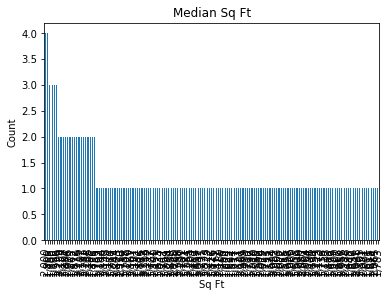

In [56]:
real_estate19to21_formatted["median_square_feet"].value_counts().plot(kind='bar')
plt.title('Median Sq Ft')
plt.xlabel('Sq Ft')
plt.ylabel('Count')
sns.despine

In [71]:
#Establish Dependent and Independent Variables

### Place Holder Code 

#X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
 #              'Avg. Area Number of Bedrooms', 'Area Population']]

#y = HouseDF['Price']

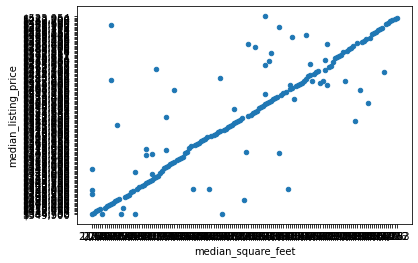

In [55]:
#Visuaize the Data

real_estate19to21_formatted.plot(
   x='median_square_feet', 
   y='median_listing_price', 
   kind='scatter'
)

plt.show()

Text(0.5, 1.0, 'Price vs Days on the Market')

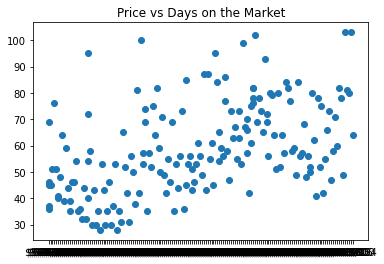

In [58]:
plt.scatter(real_estate19to21_formatted.median_listing_price, real_estate19to21_formatted.median_days_on_market)
plt.title("Price vs Days on the Market")

Text(0.5, 1.0, 'Price vs Sq Ft')

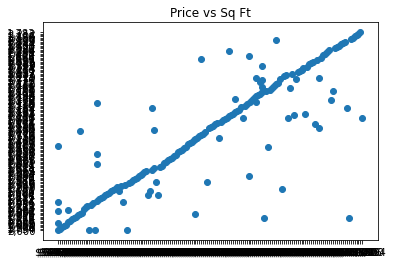

In [57]:
plt.scatter(real_estate19to21_formatted.median_listing_price, real_estate19to21_formatted.median_square_feet)
plt.title("Price vs Sq Ft")

In [59]:
from sklearn.linear_model import LinearRegression

In [61]:
reg = LinearRegression()

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
#Fit the Model
x_train, x_test, y_train, y_test = train_test_split(train1 , labels , test_size = 0.25, random_state = 21)

NameError: name 'train1' is not defined

In [70]:
##y_pred = model.predict(X)
##print(y_pred.shape)

In [69]:
##plt.scatter(X, y)
##plt.plot(X, y_pred, color='red')
##plt.show()

In [68]:
##print(model.coef_)
##print(model.intercept_)